In [1]:
# General Imports
from PIL import Image
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import preprocessing
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.model_selection import train_test_split

from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from datetime import datetime
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, UpSampling2D, Dropout,BatchNormalization,GlobalAveragePooling2D
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# Load CIFAR-100 data
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

169001437/169001437 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ["apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle", "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle", "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur", "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain", "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket", "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider", "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor", "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"]

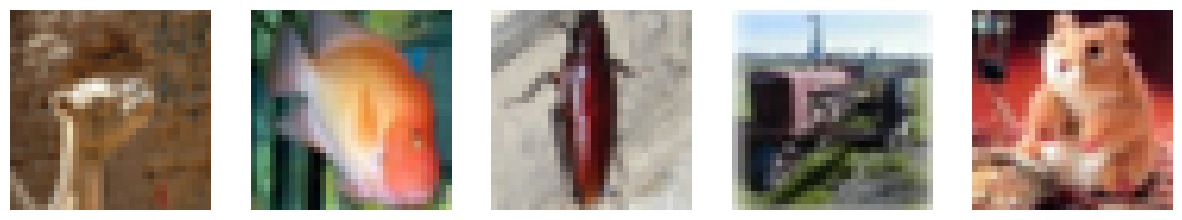

In [4]:
n = 5
random_indices = np.random.randint(0, X_train.shape[0], n)

plt.figure(figsize=(15, 3))
for i, index in enumerate(random_indices, 1):
    plt.subplot(1, n, i)
    plt.imshow(X_train[index])
    plt.axis('off')

plt.show()

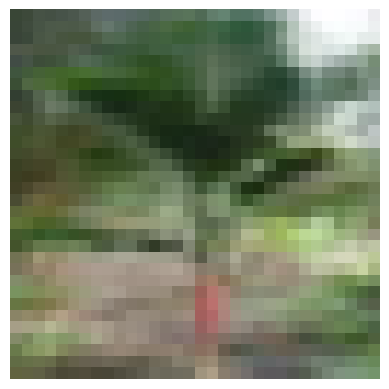

[56]


In [5]:
idx = 44

plt.imshow(X_train[idx])
plt.axis('off')
plt.show()

print(y_train[idx])

In [6]:
# Preprocess data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_val.shape,y_val.shape,X_test.shape, y_test.shape)

(40000, 32, 32, 3) (40000, 100) (10000, 32, 32, 3) (10000, 100) (10000, 32, 32, 3) (10000, 100)


In [8]:
print(y_train[idx])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [9]:
train_datagen = ImageDataGenerator(
        rotation_range = 10,
        zoom_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        shear_range = 0.1,
        horizontal_flip = True,
        vertical_flip = False
        )
train_datagen.fit(X_train)

In [10]:
#Reduce Learning Rate if accuracy is not improving for 3 epochs
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.6,
    min_lr=1e-6)

In [11]:
densenet_model =  DenseNet201(include_top = False,weights = 'imagenet',input_shape = (128,128,3))

for layer in densenet_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

74836368/74836368 [==============================] - 1s 0us/step


In [13]:
model=tf.keras.models.Sequential()
model.add(UpSampling2D(size=(4, 4),interpolation='bilinear'))
model.add(densenet_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation='softmax'))

In [14]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

In [15]:
model.compile(
    optimizer = optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val),callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)])

Epoch 1/100
313/313 [==============================] - 255s 616ms/step - loss: 1.8753 - accuracy: 0.5202 - val_loss: 1.1004 - val_accuracy: 0.6741
Epoch 2/100
313/313 [==============================] - 186s 593ms/step - loss: 0.8961 - accuracy: 0.7321 - val_loss: 0.8406 - val_accuracy: 0.7441
Epoch 3/100
313/313 [==============================] - 185s 591ms/step - loss: 0.7236 - accuracy: 0.7774 - val_loss: 0.7962 - val_accuracy: 0.7571
Epoch 4/100
313/313 [==============================] - 185s 590ms/step - loss: 0.6248 - accuracy: 0.8062 - val_loss: 0.7273 - val_accuracy: 0.7815
Epoch 5/100
313/313 [==============================] - 178s 567ms/step - loss: 0.5567 - accuracy: 0.8238 - val_loss: 0.7964 - val_accuracy: 0.7642
Epoch 6/100
313/313 [==============================] - 184s 589ms/step - loss: 0.5006 - accuracy: 0.8390 - val_loss: 0.7474 - val_accuracy: 0.7815
Epoch 7/100
313/313 [==============================] - 185s 590ms/step - loss: 0.4724 - accuracy: 0.8463 - val_loss: 0

In [16]:
# Evaluate the model
score = model.evaluate(X_val, y_val)

print(score)

313/313 [==============================] - 21s 61ms/step - loss: 0.7775 - accuracy: 0.7832
[0.7775285840034485, 0.7832000255584717]


In [17]:
print(f'Test Loss: {score[0]:.4f}, Test Accuracy: {score[1]:.4f}')

Test Loss: 0.7775, Test Accuracy: 0.7832


In [18]:
# Generate predictions
y_pred = model.predict(X_test)

idx = 10

print(y_pred[idx])
print(y_test[idx])

313/313 [==============================] - 21s 55ms/step
[1.42299932e-05 8.84573410e-07 1.93142432e-06 7.16655841e-03
 5.52136044e-04 8.63921596e-05 2.61705907e-07 2.28769323e-07
 5.80020642e-05 2.30940668e-06 3.97131907e-06 5.95902675e-05
 7.26271421e-02 1.08954016e-04 9.83443371e-08 2.12229602e-03
 8.44504598e-07 1.08536377e-04 8.13268230e-07 8.18427507e-05
 1.73267454e-05 2.26078133e-04 4.15903600e-07 2.58013577e-04
 7.15581848e-07 7.75458921e-06 1.95111875e-06 1.68277096e-04
 2.68876147e-06 9.51433263e-04 3.57746473e-03 4.59317863e-02
 1.85837798e-05 1.98778347e-03 1.39442773e-05 8.63795518e-04
 2.85057695e-07 1.50793442e-03 2.56358853e-05 4.47031016e-06
 2.58759223e-03 9.62453851e-06 1.36850140e-04 1.11441932e-05
 2.21037935e-05 1.78645098e-06 1.62833149e-03 3.01876189e-05
 1.02891136e-05 3.79101909e-03 4.79707261e-08 1.15142473e-04
 2.01084767e-04 1.34207003e-05 1.06858824e-05 2.05608690e-03
 4.03916508e-01 1.28250338e-06 5.18412753e-06 3.79631366e-03
 1.70754225e-04 2.67596602e-

In [19]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(y_pred_classes[idx])
print(y_true_classes[idx])

71
71


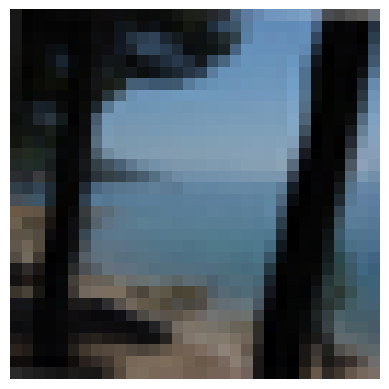

In [20]:
plt.imshow(X_test[idx])
plt.axis('off')
plt.show()

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

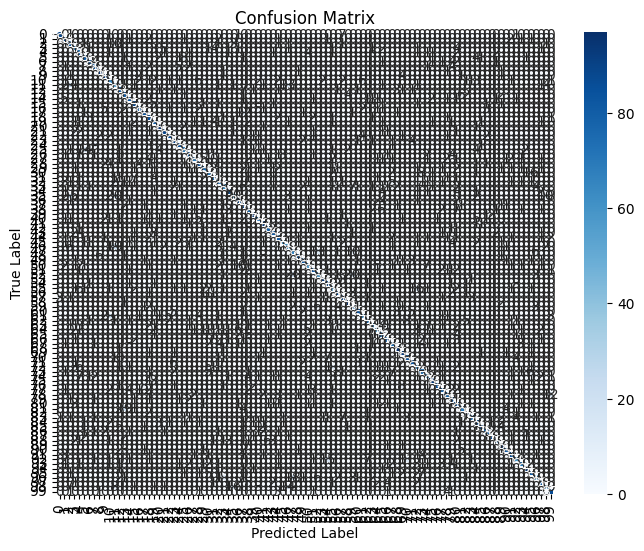

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(100), yticklabels=range(100))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [23]:
print(classification_report(y_true=y_true_classes, y_pred=y_pred_classes, target_names=class_names))

               precision    recall  f1-score   support

        apple       0.96      0.89      0.92       100
aquarium_fish       0.77      0.88      0.82       100
         baby       0.52      0.80      0.63       100
         bear       0.73      0.65      0.69       100
       beaver       0.61      0.76      0.68       100
          bed       0.78      0.81      0.79       100
          bee       0.86      0.83      0.85       100
       beetle       0.79      0.80      0.80       100
      bicycle       0.91      0.96      0.94       100
       bottle       0.88      0.90      0.89       100
         bowl       0.62      0.65      0.64       100
          boy       0.45      0.51      0.48       100
       bridge       0.75      0.82      0.78       100
          bus       0.70      0.81      0.75       100
    butterfly       0.77      0.82      0.79       100
        camel       0.79      0.87      0.83       100
          can       0.88      0.76      0.82       100
       ca

In [24]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

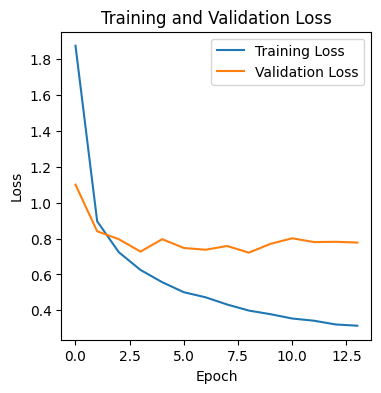

In [25]:
plt.figure(figsize=(4, 4))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

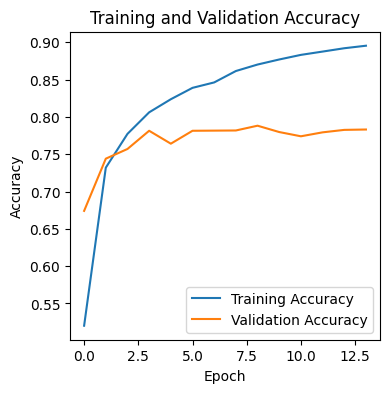

In [26]:
plt.figure(figsize=(4, 4))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()